In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
url = 'https://raw.githubusercontent.com/MarioMtzC99/FisicaComputacional1/main/Actividad1/DatosClimatolog%C3%ADaPitiquito.txt'
mis_columnas = ['Fecha', 'Precip', 'Evap', 'Tmax', 'Tmin']
df_carac = pd.read_csv(url, names=mis_columnas, encoding='cp1251', sep='\s+', header=None, skiprows=19, skipfooter=1, engine='python')
df_work = df_carac.copy()
str_Nulo = 'Nulo'
df_trabajo = df_work.replace(to_replace=str_Nulo, value='', regex=True)
columnas_list = ['Precip', 'Evap', 'Tmax', 'Tmin']
for columnas in columnas_list:
  df_trabajo[columnas] = pd.to_numeric(df_trabajo[columnas], errors='coerce')
df_paso4 = df_trabajo.copy()
df_paso4['Fecha']=pd.to_datetime(df_paso4['Fecha'], dayfirst=True).copy()
df_paso4['Año'] = df_paso4['Fecha'].dt.year
#Como la columna mes la queremos con el nombre abreviado del mes, por lo que utilizamos la
#función df.dt.strftime('%b')
df_paso4['Mes'] = df_paso4['Fecha'].dt.strftime('%b')
df_paso4.info()
print(df_paso4.head())
print(df_paso4.tail())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21585 entries, 0 to 21584
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Fecha   21585 non-null  datetime64[ns]
 1   Precip  21536 non-null  float64       
 2   Evap    14380 non-null  float64       
 3   Tmax    21528 non-null  float64       
 4   Tmin    21529 non-null  float64       
 5   Año     21585 non-null  int64         
 6   Mes     21585 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 1.2+ MB
       Fecha  Precip  Evap  Tmax  Tmin   Año  Mes
0 1952-07-01     0.0   NaN  42.0  22.0  1952  Jul
1 1952-07-02     0.0   NaN  42.5  25.0  1952  Jul
2 1952-07-03     0.0   NaN  43.0  25.5  1952  Jul
3 1952-07-04     0.0   NaN  44.0  27.5  1952  Jul
4 1952-07-05     0.0   NaN  43.5  25.5  1952  Jul
           Fecha  Precip  Evap  Tmax  Tmin   Año  Mes
21580 2015-12-27     0.0   NaN  16.0  -4.0  2015  Dec
21581 2

In [ ]:
df_A5_ts = df_paso4.copy()
#Reemplazamos el índice por la variable 'Fecha'
df_A5_ts = df_A5_ts.set_index('Fecha')
df_A5_ts.info()
print(df_A5_ts.head())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 21585 entries, 1952-07-01 to 2015-12-31
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Precip  21536 non-null  float64
 1   Evap    14380 non-null  float64
 2   Tmax    21528 non-null  float64
 3   Tmin    21529 non-null  float64
 4   Año     21585 non-null  int64  
 5   Mes     21585 non-null  object 
dtypes: float64(4), int64(1), object(1)
memory usage: 1.2+ MB
            Precip  Evap  Tmax  Tmin   Año  Mes
Fecha                                          
1952-07-01     0.0   NaN  42.0  22.0  1952  Jul
1952-07-02     0.0   NaN  42.5  25.0  1952  Jul
1952-07-03     0.0   NaN  43.0  25.5  1952  Jul
1952-07-04     0.0   NaN  44.0  27.5  1952  Jul
1952-07-05     0.0   NaN  43.5  25.5  1952  Jul


# **Actividad 1.**
Explora tus datos de Precipitación los últimos años 1990-fin de los datos.

*   Grafica todo el rango de datos utilizando la función df.plot()
*   Analiza un año específico completo, utiliza la función df.loc() para seleccionar el rango de datos.
* Grafica estacionalidad de tus datos por mes utilizando la función sns.barplot()

In [ ]:
#Creamos conjunto de datos que separen los datos generales obtenidos.
df_52 = df_A5_ts[(df_A5_ts['Año'] >= 1952) & (df_A5_ts['Año'] < 1973)]
df_73 = df_A5_ts[(df_A5_ts['Año'] >= 1973) & (df_A5_ts['Año'] < 1994)]
df_94 = df_A5_ts[(df_A5_ts['Año'] >= 1994) & (df_A5_ts['Año'] < 2015)]

In [ ]:
df_94.head()

,Precip,Evap,Tmax,Tmin,Año,Mes
Fecha,,,,,,
1994-01-01,0.0,3.6,25.0,5.5,1994,Jan
1994-01-02,0.0,4.1,24.0,6.0,1994,Jan
1994-01-03,0.0,4.9,27.0,7.0,1994,Jan
1994-01-04,0.0,5.1,30.0,5.0,1994,Jan
1994-01-05,0.0,3.0,26.0,5.0,1994,Jan


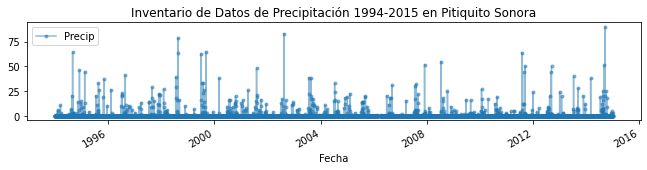

In [ ]:
cols_plot = ['Precip']
ax_ylabels = ['Precip (mm)']
axes = df_94[cols_plot].plot(marker='.', alpha=0.5, linestyle='-', figsize=(11,2), subplots=True)
plt.title('Inventario de Datos de Precipitación 1994-2015 en Pitiquito Sonora');

Text(0.5, 1.0, 'Precipitación en Pitiquito Sonora (1994-2015)')

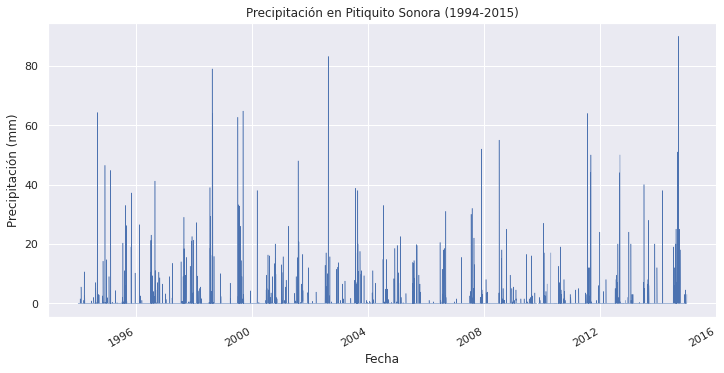

In [ ]:
sns.set(rc={'figure.figsize':(12,6)})
df_94['Precip'].plot(linewidth=0.5);
plt.ylabel('Precipitación (mm)');
plt.title('Precipitación en Pitiquito Sonora (1994-2015)')

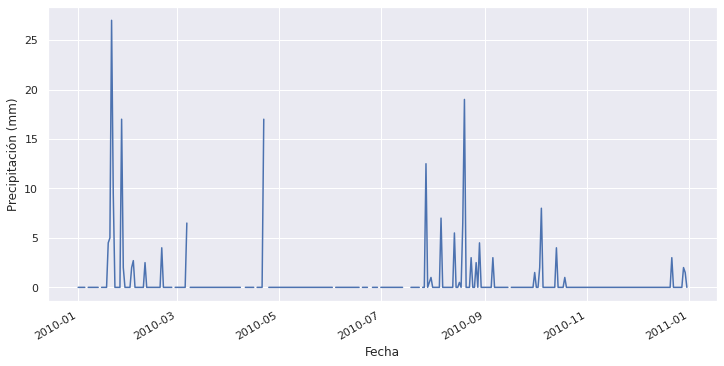

In [ ]:
sns.set(rc={'figure.figsize':(12,6)})
ax = df_94.loc['2010', 'Precip'].plot()
ax.set_ylabel('Precipitación (mm)');

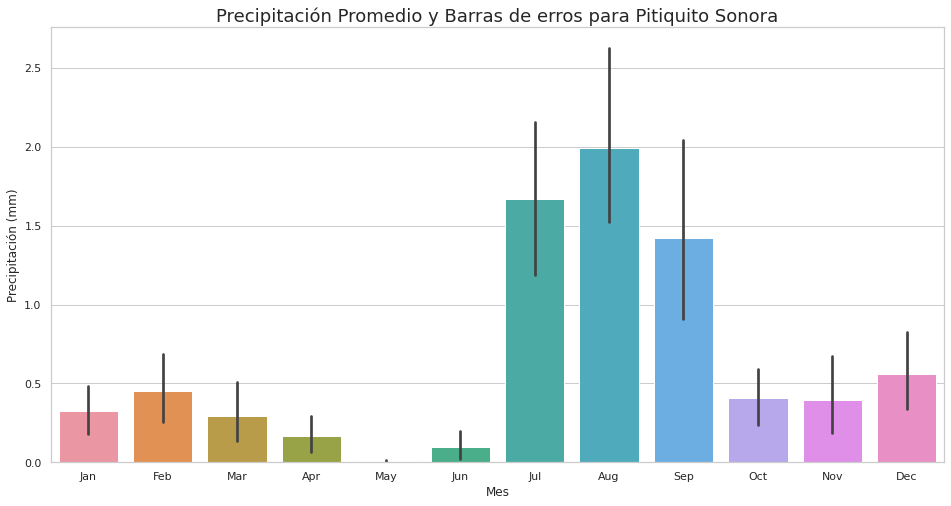

In [ ]:
sns.set_style('whitegrid')
plt.figure(figsize=(16,8))
g =sns.barplot(x='Mes', y='Precip', data=df_94);
plt.xlabel('Mes')
plt.ylabel('Precipitación (mm)')
plt.title('Precipitación Promedio y Barras de erros para Pitiquito Sonora', fontsize=18)
plt.show()

# **Actividad 2.**
Explora tus datos de Temperaturas Máxima y Mínima de los últimos 30 años datos a partir de 1990.  Trata de construir dos subgráficas contiguas.


*   Grafica todo el rango de datos utilizando la función df.plot(), incluye una línea puntrada mostrando el promedio.
*   Analiza un año específico completo para las dos temperaturas, con apoyo de la función df.loc()
*   Grafica la estacionalidad filtrando tus datos por mes y utilizando la función sns.boxplot(), incluye una línea punteada mostrando el promedio.



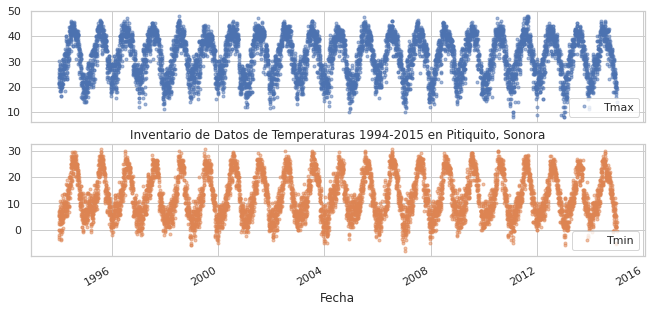

In [ ]:
cols_plot = ['Tmax', 'Tmin']
ax_ylabels = ['Temperatura Máxima (°C)', 'Temperatura Mínima (°C)']
axes = df_94[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11,5), subplots=True)
plt.title('Inventario de Datos de Temperaturas 1994-2015 en Pitiquito, Sonora');

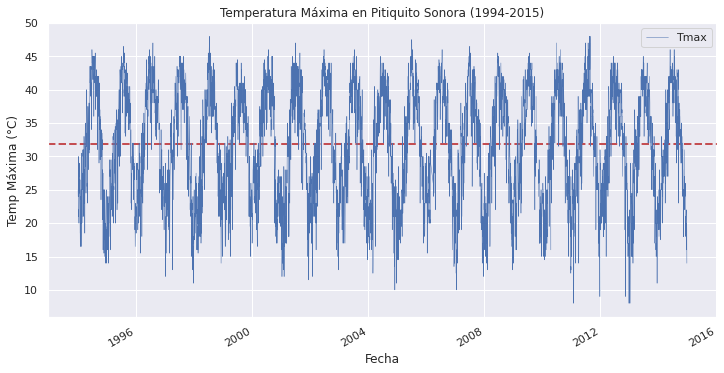

In [ ]:
#Gráfica de la temperatura máxima de 1994-2015.
sns.set(rc={'figure.figsize':(12,6)})
Tmax_ave = df_94.Tmax.mean()
plt.axhline(Tmax_ave, color = 'r', linestyle='--', linewidth=2);
df_94['Tmax'].plot(linewidth=0.5);
plt.ylabel('Temp Máxima (°C)');
plt.title('Temperatura Máxima en Pitiquito Sonora (1994-2015)')
plt.legend();

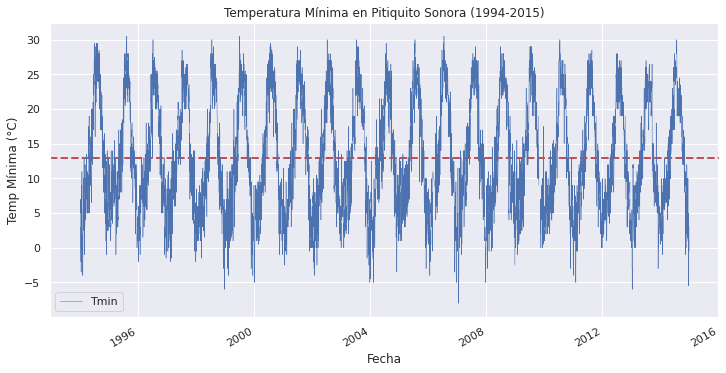

In [ ]:
#Ahora, la gráfica mínima.
sns.set(rc={'figure.figsize':(12,6)})
Tmin_ave = df_94.Tmin.mean()
plt.axhline(Tmin_ave, color = 'r', linestyle='--',  linewidth=2);
df_94['Tmin'].plot(linewidth=0.5);
plt.ylabel('Temp Mínima (°C)');
plt.title('Temperatura Mínima en Pitiquito Sonora (1994-2015)')
plt.legend();


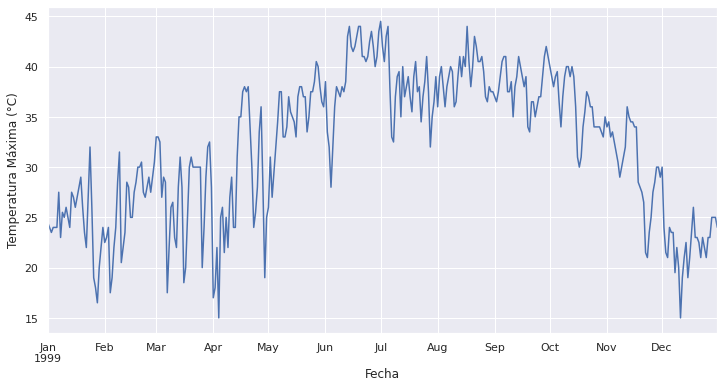

In [ ]:
#Analizando la temperatura máxima del año 1999.
sns.set(rc={'figure.figsize':(12,6)})
ax = df_94.loc['1999','Tmax'].plot()
ax.set_ylabel('Temperatura Máxima (°C)');

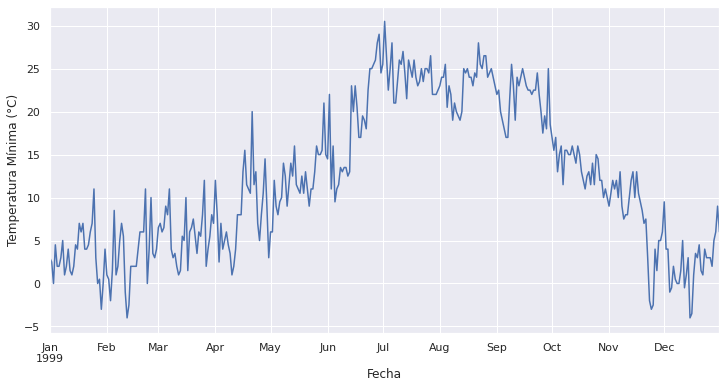

In [ ]:
#Ahora la temperatura mínima.
sns.set(rc={'figure.figsize':(12,6)})
ax = df_94.loc['1999', 'Tmin'].plot()
ax.set_ylabel('Temperatura Mínima (°C)');

Text(0.5, 1.0, 'Tmax')

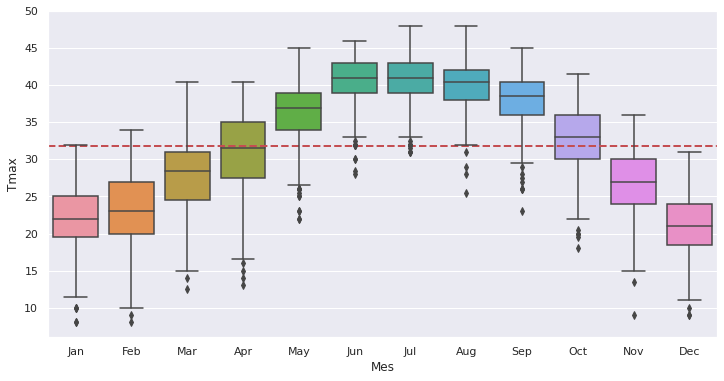

In [ ]:
#Graficando diagramas de caja de Tmax.
Tmax_ave = df_94.Tmax.mean()
plt.axhline(Tmax_ave, color = 'r', linestyle='--', linewidth=2);
sns.boxplot(data=df_94, x='Mes', y='Tmax')
ax.set_title('Tmax')

Text(0.5, 1.0, 'Tmin')

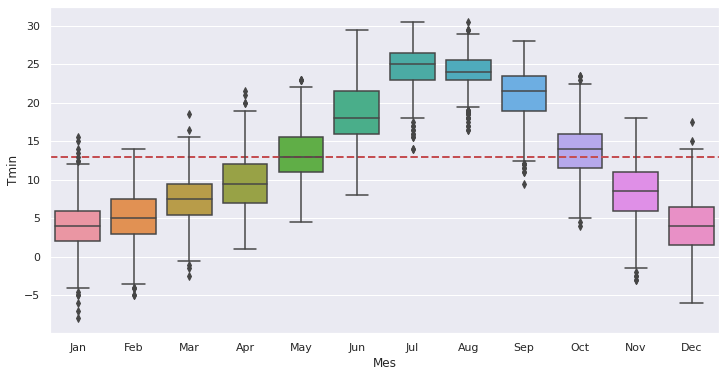

In [ ]:
#Graficando diagramas de caja de Tmin.
Tmin_ave = df_94.Tmin.mean()
plt.axhline(Tmin_ave, color = 'r', linestyle='--', linewidth=2);
sns.boxplot(data=df_94, x='Mes', y='Tmin')
ax.set_title('Tmin')

# **Actividad 3.**
Realiza el mismo análisis que en la actividad 2, pero para la variable de Evaporación.

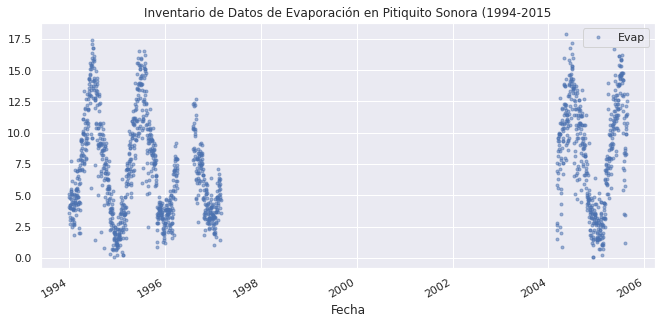

In [ ]:
cols_plot = ['Evap']
ax_ylabels = ['Evap (mm)']
axes = df_94[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11,5), subplots=True)
plt.title('Inventario de Datos de Evaporación en Pitiquito Sonora (1994-2015');

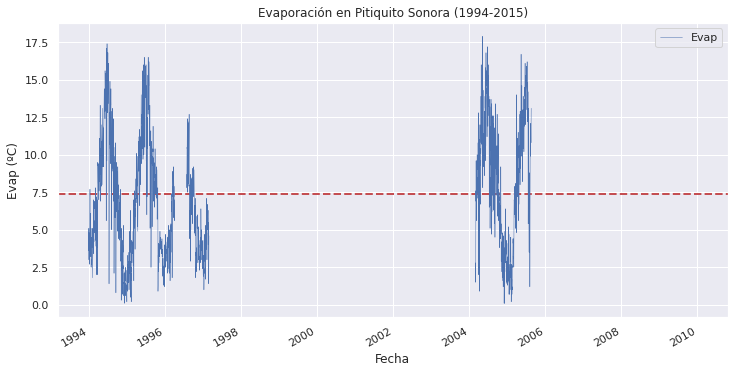

In [ ]:
sns.set(rc={'figure.figsize':(12, 6)})

# Cálculo de promedio
Evap_ave = df_94.Evap.mean()
plt.axhline(Evap_ave, color = 'r', linestyle='--', linewidth=2);

df_94['Evap'].plot(linewidth=0.5);
plt.ylabel('Evap (ºC)');
plt.title('Evaporación en Pitiquito Sonora (1994-2015)')

plt.legend();

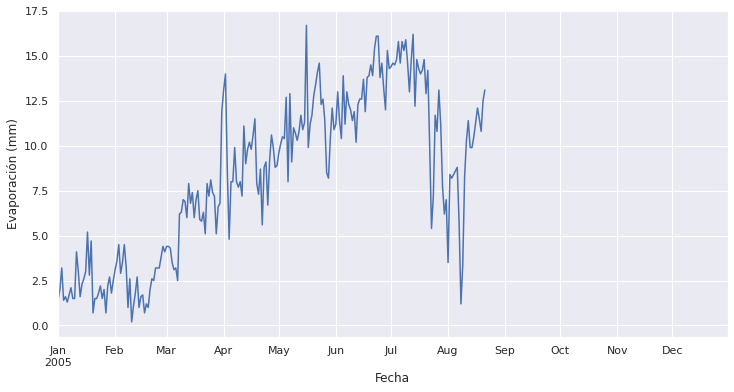

In [ ]:
sns.set(rc={'figure.figsize':(12, 6)})
ax = df_94.loc['2005', 'Evap'].plot()
ax.set_ylabel('Evaporación (mm)');

Text(0.5, 1.0, 'Evap')

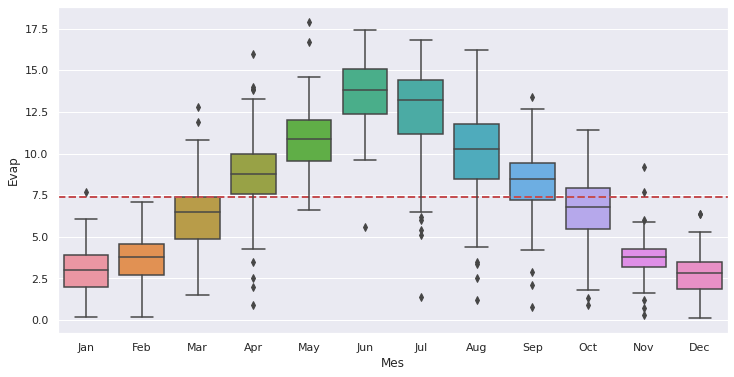

In [ ]:
Evap_ave = df_94.Evap.mean()

plt.axhline(Evap_ave, color = 'r', linestyle='--', linewidth=2);

sns.boxplot(data=df_94, x='Mes', y='Evap')
  
  
ax.set_title('Evap')

# **Actividad 4.**
Crea nuevos DataFrames de las Temperaturas y la Evaporación con promedios móviles de 7, 30 y 365 días, utilizando la función df.rolling(). Explora tus datos:

*  Para un año de datos, contrastando los datos diarios con el promedio móvil de 7 y 30 días.
*  Explora para 10 o más años de datos, contrastando los datos diarios con las gráficas de promedio móvil de 365 días.

In [ ]:
data_cols = ['Evap', 'Tmax', 'Tmin']
df_94_7d = df_94[data_cols].rolling(7, center=True).mean()
df_94_30d = df_94[data_cols].rolling(30, center=True).mean()
df_94_365d = df_94[data_cols].rolling(365, center=True).mean()

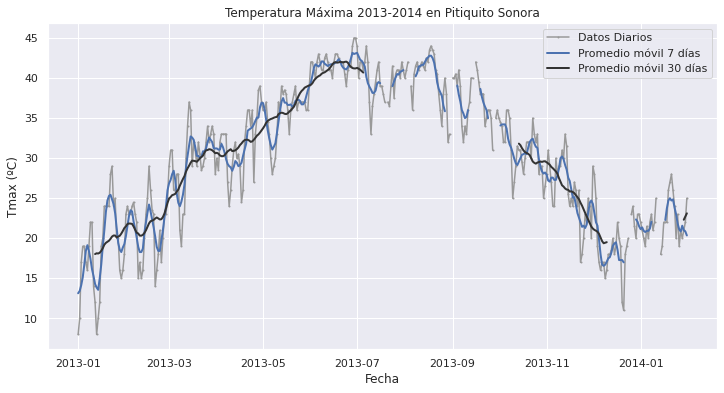

In [ ]:
start, end = '2013-01', '2014-01'
sns.set(rc={'figure.figsize':(12,6)})
fig, ax = plt.subplots()
ax.plot(df_94.loc[start:end, 'Tmax'],
marker='.', markersize=2, linestyle='-', color='0.6',label='Datos Diarios')
ax.plot(df_94_7d.loc[start:end, 'Tmax'], linestyle='-', linewidth=2, label='Promedio móvil 7 días')
ax.plot(df_94_30d.loc[start:end, 'Tmax'], linestyle='-', color='0.2', linewidth=2, label='Promedio móvil 30 días')

ax.set_xlabel('Fecha')
ax.set_ylabel('Tmax (ºC)')
ax.set_title('Temperatura Máxima 2013-2014 en Pitiquito Sonora')
ax.legend();

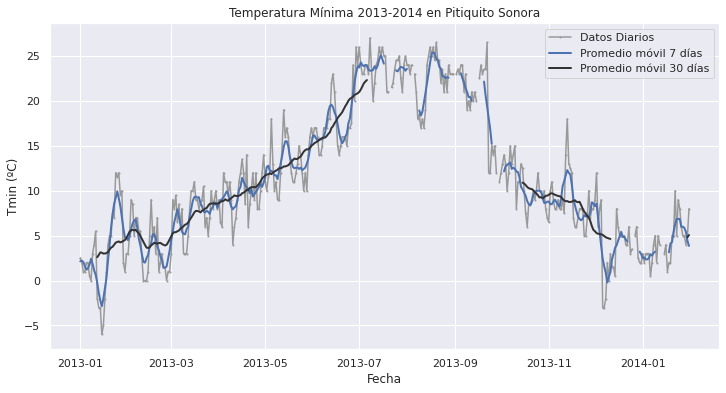

In [ ]:
start, end = '2013-01', '2014-01'
sns.set(rc={'figure.figsize':(12,6)})
fig, ax = plt.subplots()
ax.plot(df_94.loc[start:end, 'Tmin'],
marker='.', markersize=2, linestyle='-', color='0.6',label='Datos Diarios')
ax.plot(df_94_7d.loc[start:end, 'Tmin'], linestyle='-', linewidth=2, label='Promedio móvil 7 días')
ax.plot(df_94_30d.loc[start:end, 'Tmin'], linestyle='-', color='0.2', linewidth=2, label='Promedio móvil 30 días')

ax.set_xlabel('Fecha')
ax.set_ylabel('Tmin (ºC)')
ax.set_title('Temperatura Mínima 2013-2014 en Pitiquito Sonora')
ax.legend();

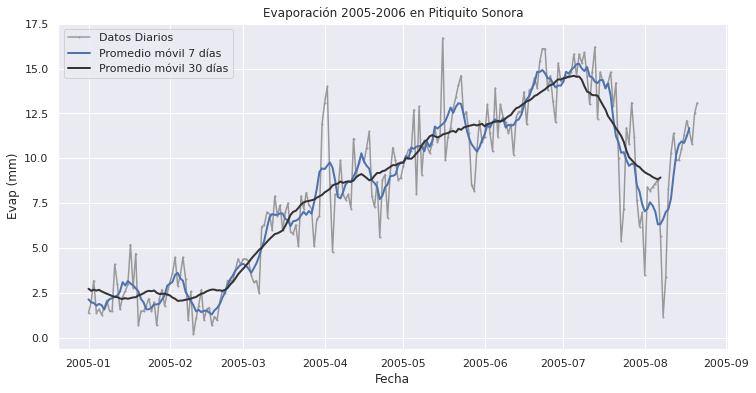

In [ ]:
start, end = '2005-01', '2006-01'
sns.set(rc={'figure.figsize':(12,6)})
fig, ax = plt.subplots()
ax.plot(df_94.loc[start:end, 'Evap'],
marker='.', markersize=2, linestyle='-', color='0.6',label='Datos Diarios')
ax.plot(df_94_7d.loc[start:end, 'Evap'], linestyle='-', linewidth=2, label='Promedio móvil 7 días')
ax.plot(df_94_30d.loc[start:end, 'Evap'], linestyle='-', color='0.2', linewidth=2, label='Promedio móvil 30 días')

ax.set_xlabel('Fecha')
ax.set_ylabel('Evap (mm)')
ax.set_title('Evaporación 2005-2006 en Pitiquito Sonora')
ax.legend();

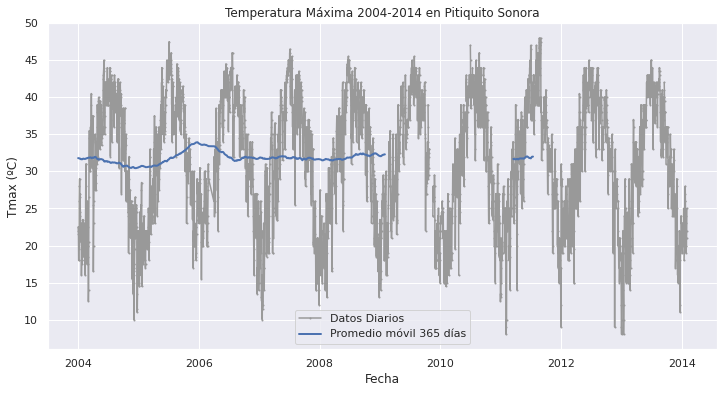

In [ ]:
start, end = '2004-01', '2014-01'
sns.set(rc={'figure.figsize':(12, 6)})
fig, ax = plt.subplots()
ax.plot(df_94.loc[start:end, 'Tmax'],
marker='.', markersize=2, linestyle='-', color='0.6',label='Datos Diarios')
ax.plot(df_94_365d.loc[start:end, 'Tmax'], linestyle='-', linewidth=2, label='Promedio móvil 365 días')

ax.set_xlabel('Fecha')
ax.set_ylabel('Tmax (ºC)')
ax.set_title('Temperatura Máxima 2004-2014 en Pitiquito Sonora')
ax.legend();

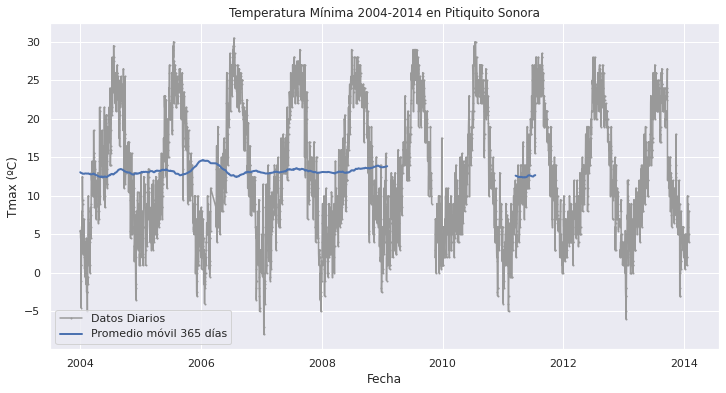

In [ ]:
start, end = '2004-01', '2014-01'
sns.set(rc={'figure.figsize':(12, 6)})
fig, ax = plt.subplots()
ax.plot(df_94.loc[start:end, 'Tmin'],
marker='.', markersize=2, linestyle='-', color='0.6',label='Datos Diarios')
ax.plot(df_94_365d.loc[start:end, 'Tmin'], linestyle='-', linewidth=2, label='Promedio móvil 365 días')

ax.set_xlabel('Fecha')
ax.set_ylabel('Tmax (ºC)')
ax.set_title('Temperatura Mínima 2004-2014 en Pitiquito Sonora')
ax.legend();

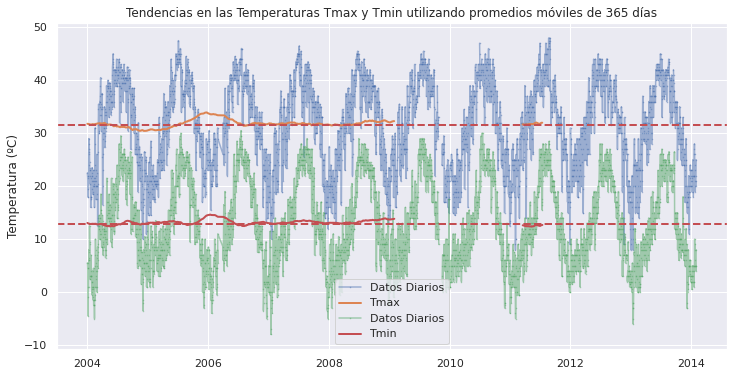

In [ ]:
sns.set(rc={'figure.figsize':(12, 6)})
start, end = '2004-01', '2014-01'
fig, ax = plt.subplots()
for nm in ['Tmax', 'Tmin']:
    ax.plot(df_94.loc[start:end, nm], marker='.', markersize=1, linestyle='-', alpha=0.5, label='Datos Diarios')
    ax.plot(df_94_365d.loc[start:end, nm], linewidth=2, label=nm)
    plt.axhline(df_94.loc[start:end, nm].mean(), color = 'r', linestyle='--', linewidth=2);
    
    ax.legend()
    ax.set_ylabel('Temperatura (ºC)')
    ax.set_title('Tendencias en las Temperaturas Tmax y Tmin utilizando promedios móviles de 365 días');

# **Actividad 5.**
Utiliza la biblioteca statsmodels.tsa de Python, para realizar una descomposición de una serie de tiempo: Serie Observada = Tendencia + Estacionalidad + Residuo.

Aplica la función _seasonaldecompose para lograr esto, a los datos de Temperaturas Tmax y Tmin, y si tienes datos de Evaporación, selecciona un periodo que haya datos. La función de seasonal_decompose aplica su propio promedio móvil a las series de datos para su análisis.

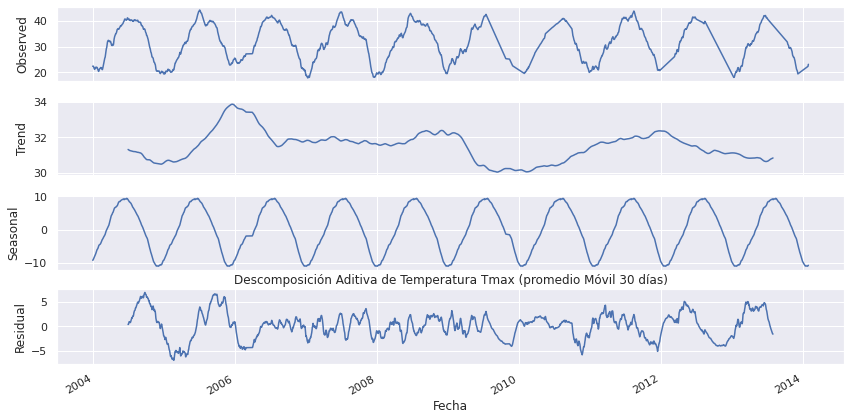

In [ ]:
sns.set(rc={'figure.figsize':(12, 6)})
start, end = '2004-01', '2014-01'
decompfreq = 365
resTmax = sm.tsa.seasonal_decompose(df_94_30d.loc[start:end, 'Tmax'].interpolate(),
                                    freq=decompfreq, model='additive')
resTmax.plot()

plt.title('Descomposición Aditiva de Temperatura Tmax (promedio Móvil 30 días)');

In [ ]:
resTmax.trend.describe()


count    3265.000000
mean       31.493870
std         0.806979
min        30.031455
25%        30.840108
50%        31.625936
75%        31.928037
max        33.854338
Name: Tmax, dtype: float64

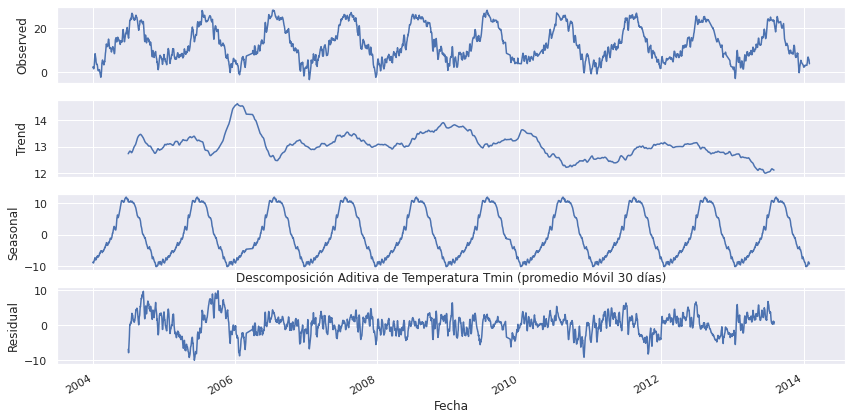

In [ ]:
sns.set(rc={'figure.figsize':(12, 6)})
start, end = '2004-01', '2014-01'
decompfreq = 365
resTmin = sm.tsa.seasonal_decompose(df_94_7d.loc[start:end, 'Tmin'].interpolate(),
                                    freq=decompfreq, model='additive')
resTmin.plot()

plt.title('Descomposición Aditiva de Temperatura Tmin (promedio Móvil 30 días)');

In [ ]:
resTmin.trend.describe()

count    3265.000000
mean       13.068060
std         0.458545
min        12.011546
25%        12.776321
50%        13.067319
75%        13.292564
max        14.631703
Name: Tmin, dtype: float64

# **Actividad 6.**
Por favor explora visualmente si se observa un cambio en la distribución de Temperaturas (histogramas y kde), sobreponiendo dos histogramas de dos periodos de 30 años contiguos. Utiliza la función de Seaborn: sns.distplot. Agrega una línea vertical punteada indicando el valor del promedio de cada grupo de datos.  

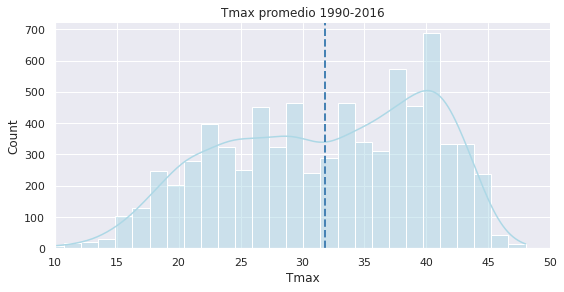

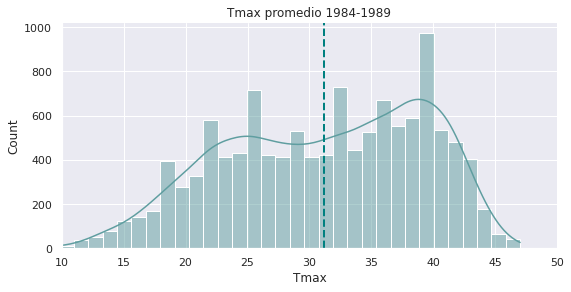

Temperatura máxima promedio del periodo 1990-2016 =  31.82125380240709 ºC
Temperatura máxima promedio del periodo 1984-1986 =  31.149715885695464 ºC


In [ ]:
g1 = sns.displot(df_94.Tmax, kde=True, color='lightblue', height=4, aspect=2);
plt.axvline(df_94.Tmax.mean(), linestyle='--', linewidth=2, color='steelblue');

df_primeros = df_A5_ts[(df_A5_ts['Año'] < 1990)]
g2 = sns.displot(df_primeros.Tmax, kde=True, color='cadetblue', height=4, aspect=2);
plt.axvline(df_primeros.Tmax.mean(), linestyle='--', linewidth=2, color='teal');

g1.set(title='Tmax promedio 1990-2016');
g2.set(title='Tmax promedio 1984-1989');
g1.set(xlim=(10,50))
g2.set(xlim=(10,50))


plt.show();

print('Temperatura máxima promedio del periodo 1990-2016 = ', df_94.Tmax.mean(), 'ºC' )
print('Temperatura máxima promedio del periodo 1984-1986 = ', df_primeros.Tmax.mean(), 'ºC' )